In [2]:
import pandas as pd

In [10]:
df1 = pd.read_csv("nucleophilicity.csv",header=None)
df1.columns = ['Chemical_reaction',"numerical_unit"]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Chemical_reaction  1232 non-null   object 
 1   numerical_unit     1232 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.4+ KB


In [11]:
df1.describe()

,numerical_unit
count,1232.000000
mean,11.701257
std,13.482363
min,-8.290276
25%,-1.514018
50%,9.741558
75%,21.952947
max,42.851828


In [12]:
# how to sort data
df1.sort_values('numerical_unit')

,Chemical_reaction,numerical_unit
920,CC(C)C(C(C)C)[O:1]c1ccccc1,-8.290276
29,CCC(CC)[O:1]c1ccccc1,-7.721085
1219,CC(C)(C)C[O:1]c1ccccc1,-7.636703
242,C[O:1]c1ccccc1,-7.552478
680,CCC[O:1]c1ccccc1,-7.418373
...,...,...
619,CC[C-:1](C)CC(C)C,41.965317
226,CCC[C-:1](CC)CC(C)C,42.323811
909,CCC[C-:1](C)CCC,42.496023
778,CC[C-:1](CC)CC(C)C,42.671739


In [17]:
df1.sort_values('numerical_unit',ascending=False).head(10)

,Chemical_reaction,numerical_unit
1087,CC[C-:1](C)C(C)C,42.851828
778,CC[C-:1](CC)CC(C)C,42.671739
909,CCC[C-:1](C)CCC,42.496023
226,CCC[C-:1](CC)CC(C)C,42.323811
619,CC[C-:1](C)CC(C)C,41.965317
443,CC(C)[C-:1](C)C(C)C,41.840619
133,C[CH-:1]CC(C)C,41.813428
461,CCC[C-:1](CC(C)C)C(C)C,41.807281
434,CCC[C-:1](CC(C)C)CC(C)C,41.761529
323,CCC[C-:1](CC)CC,41.719323


<Axes: xlabel='Chemical_reaction'>

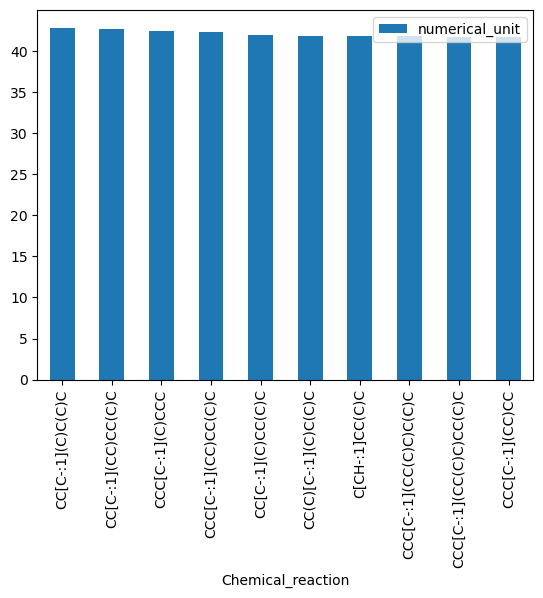

In [21]:
df1_1 = df1.set_index("Chemical_reaction")
df1_1.sort_values('numerical_unit',ascending=False).head(10).plot(kind="bar")

In [22]:
# if there is any repeating data in this file?

In [23]:
df1.value_counts("Chemical_reaction")

Chemical_reaction
C(=[O:1])N                           1
CCC[CH-:1]c1ccccc1                   1
CCC[CH:1]=C[O-]                      1
CCC[CH:1]=C=[N-]                     1
CCC[CH:1]=C(c1ccccc1)[O-]            1
                                    ..
CCC(C(C)C)[C:1](=C=[N-])Cc1ccccc1    1
CCC(C(C)C)[C:1](=C=[N-])CC(C)C       1
CCC(C(C)C)[C:1](=C=[N-])CC(C)(C)C    1
CCC(C(C)C)[C:1](=C=[N-])CC           1
c1ccc(cc1)[NH2:1]                    1
Name: count, Length: 1232, dtype: int64

In [32]:
# loa data ele..
df2 = pd.read_csv("eletrophilicity.csv", header = None)
df2.columns = ['Chemical_reaction',"unit_elect"]
df2


,Chemical_reaction,unit_elect
0,CC(C)(C)[CH:1]=[OH+],3.887512
1,CCC[C+:1](CC)C=C(C)C,0.198968
2,CC[C:1](=O)C,-27.445525
3,CCN(C(C)C)[C:1](=O)C,-36.516648
4,CC[N+](=[CH:1]Cc1ccccc1)CC,-9.149123
...,...,...
1184,CCCO[C:1](=O)C(CC)CC,-31.996898
1185,CC[C:1](=[OH+])c1ccccc1,-0.778414
1186,CCC[C:1](=O)NCc1ccccc1,-35.500939
1187,c1ccc(cc1)C[C:1](=O)Cc2ccccc2,-26.894736


In [35]:
# merge them to one dataframe
import seaborn as sns

<Axes: xlabel='unit_elect'>

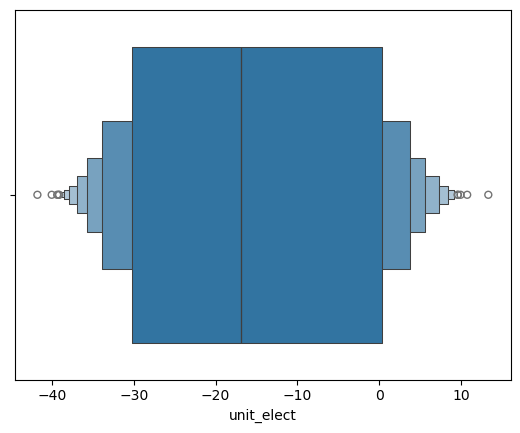

In [36]:
sns.boxenplot(x="unit_elect",data = df2)

<Axes: xlabel='numerical_unit'>

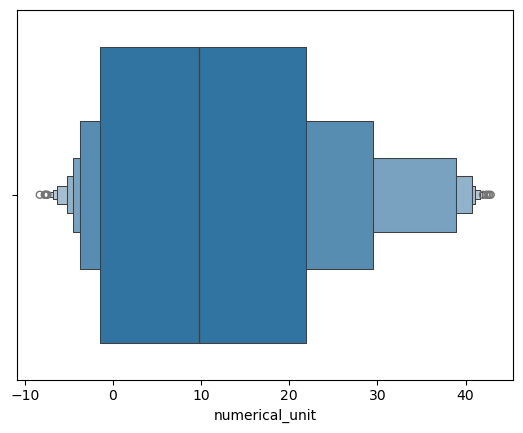

In [37]:
sns.boxenplot(x="numerical_unit",data = df1)

In [41]:
df1.merge(df2, left_on="Chemical_reaction", right_on="Chemical_reaction", how="outer")

,Chemical_reaction,numerical_unit,unit_elect
0,C(=[O:1])N,-0.696474,NaN
1,C(=[O:1])O,-5.542121,NaN
2,C=C[CH+:1]c1ccccc1,NaN,4.620544
3,C=[N:1]c1ccccc1,6.444302,NaN
4,C=[NH:1],9.003297,NaN
...,...,...,...
2416,c1ccc(cc1)[CH:1]=[N+]([O-])[O-],14.646474,NaN
2417,c1ccc(cc1)[CH:1]=[NH2+],NaN,-7.574301
2418,c1ccc(cc1)[CH:1]=[OH+],NaN,1.643799
2419,c1ccc(cc1)[NH-:1],21.498426,NaN
